In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from network import Sequential, costfunc, regularization_term, output_class


2021-12-19 18:25:00.596055: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-19 18:25:00.596104: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


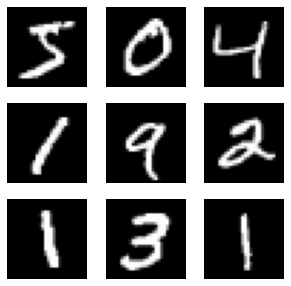

In [2]:
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot
 
#loading
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()


y = np.zeros((np.size(y_train_full),10))
X = np.zeros((len(X_train_full),784))

for i in range(np.size(y_train_full)):
    y[i,y_train_full[i]] = 1
    X[i] = np.reshape(X_train_full[i]/255.,784)

fig= plt.figure(figsize=(5,5))
axes = []
for i in range(9):
    axes.append(fig.add_subplot(3,3,i+1)) 
    plt.imshow(X[i].reshape((28,28)), cmap=plt.get_cmap('gray'))
    axes[i].axis('off')
plt.show()


In [37]:

# Create training-set of 4800 instances
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.92, random_state=42)
layer_dims = [784, 26, 10]
eps_init = 0.12

# Random weights
weights= [
            np.random.uniform(-eps_init, eps_init, (layer_dims[i + 1], layer_dims[i] + 1))
            for i in range(len(layer_dims) -1)
        ]
model = Sequential(layer_dims, weights)
alpha = 1 # Regularization parameter
n_epochs = 100
batch_size = len(y_train)

for ie in range(n_epochs):
    eta =   1.0 - 0.9*ie/n_epochs # Learning rate

    model.zero_gradients()
    y_pred = np.array(list(map(model, X_train, y_train)))
    y_out = np.array(list(map(output_class,y_pred)))
    model.make_gradients(alpha, batch_size)
    scores = [np.allclose(youti,yi) for youti, yi in zip(y_out,y_train)]
    accuracy = sum(scores)/batch_size
    cost = sum(costfunc(yi, y_predi) for yi, y_predi in zip(y_train, y_pred))
    reg_term = regularization_term(model.weights, alpha)
    cost += reg_term
    cost /= batch_size

    for i in range(model.n_weights):
        model.weights[i] -= eta*model.gradients[i] 

    if ie % 1 == 0:
        print(f"step {ie} cost {cost}, accuracy {accuracy*100}%")

step 0 cost 6.793367279550133, accuracy 9.895833333333332%
step 1 cost 3.539063515954342, accuracy 11.229166666666666%
step 2 cost 3.3075556693153283, accuracy 11.5%
step 3 cost 3.255212610341779, accuracy 13.270833333333334%
step 4 cost 3.222512834629174, accuracy 17.625%
step 5 cost 3.2015803699429357, accuracy 19.645833333333336%
step 6 cost 3.1824445210330015, accuracy 26.729166666666664%
step 7 cost 3.1629424181770065, accuracy 32.0625%
step 8 cost 3.1417849789199304, accuracy 38.9375%
step 9 cost 3.11841155145367, accuracy 42.45833333333333%
step 10 cost 3.0924809989379107, accuracy 46.270833333333336%
step 11 cost 3.0638009999371842, accuracy 49.291666666666664%
step 12 cost 3.0322959113521843, accuracy 51.83333333333333%
step 13 cost 2.9980038127039137, accuracy 53.79166666666667%
step 14 cost 2.9610734863341874, accuracy 55.25%
step 15 cost 2.921754654511116, accuracy 56.333333333333336%
step 16 cost 2.880382757292816, accuracy 57.208333333333336%
step 17 cost 2.83735746281829

In [43]:
# Test the trained model
batch_size = 5000
y_pred = np.array(list(map(model.propagate_forward, X_test[:batch_size])))
y_out = np.array(list(map(output_class,y_pred)))
scores = [np.allclose(youti,ytesti) for youti, ytesti in zip(y_out,y_test[:batch_size])]
accuracy = sum(scores)/batch_size
print(f"accuracy {accuracy*100}%")

accuracy 79.46%


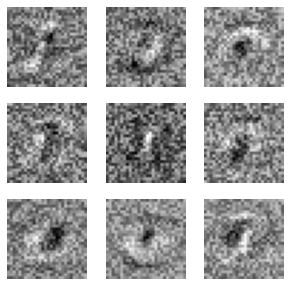

In [62]:
# Visualize hidden layers

fig= plt.figure(figsize=(5,5))
axes = []
for i in range(9):
    axes.append(fig.add_subplot(3,3,i+1)) 
    plt.imshow(model.weights[0][i,1:].reshape((28,28)), cmap=plt.get_cmap('gray'))
    axes[i].axis('off')
plt.show()